In [1]:
# !pip install quandl
# !pip install plotly

In [2]:
import os
import pickle
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from datetime import datetime
py.init_notebook_mode(connected=True)

In [3]:
# To avoid usage Limits
quandl.ApiConfig.api_key = "5r9wbefpwNFwVCRcY2KV"

In [4]:
start_date = '2016-03-14'
end_date = '2020-01-08'
btc = quandl.get('BITFINEX/BTCUSD')
# btc = btc[btc.index >= '2016-03-14']
btc = btc[(start_date <= btc.index) & (btc.index <= end_date)]
print(btc.shape)
display(btc.head())
display(btc.tail())

(1361, 7)


,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2016-03-14,417.99,411.70,414.810,414.69,414.78,414.84,9066.545413
2016-03-15,418.82,412.78,416.095,416.09,416.08,416.11,9897.042674
2016-03-16,418.00,413.96,417.395,417.39,417.39,417.40,6947.350061
2016-03-17,420.60,416.67,418.550,418.52,418.52,418.58,8465.810225
2016-03-18,419.10,403.01,408.215,408.21,408.21,408.22,20692.494105


,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2020-01-04,7422.0,7297.3,7373.05,7373.000000,7373.0,7373.1,4264.090728
2020-01-05,7509.9,7315.8,7346.65,7344.900000,7346.6,7346.7,4415.509410
2020-01-06,7785.0,7358.0,7769.75,7768.700000,7768.7,7770.8,8425.221106
2020-01-07,8210.3,7741.9,8173.75,8173.600000,8173.6,8173.9,12283.011960
2020-01-08,8442.0,7877.6,8052.95,8052.935102,8052.9,8053.0,11730.094530


In [5]:
eth = quandl.get('BITFINEX/ETHUSD')
# eth = eth[eth.index >= '2016-03-14']
eth = eth[(start_date <= eth.index) & (eth.index <= end_date)]
print(eth.shape)
display(eth.head())
display(eth.tail())

(1356, 7)


,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2016-03-14,14.950,11.400,12.9325,12.925,12.925,12.940,22922.937642
2016-03-15,13.421,11.607,12.9665,12.765,12.924,13.009,18157.378517
2016-03-16,13.890,12.621,12.8200,12.800,12.800,12.840,5431.139409
2016-03-17,12.893,10.436,11.2450,11.368,11.172,11.318,25158.103084
2016-03-18,11.200,8.338,10.8155,10.750,10.751,10.880,46391.436185


,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2020-01-04,136.35,133.12,134.565,134.57,134.56,134.57,23565.196331
2020-01-05,138.45,134.42,135.115,135.29,135.11,135.12,45771.413856
2020-01-06,144.27,135.09,144.135,144.13,144.13,144.14,66500.648329
2020-01-07,144.99,139.05,143.705,143.70,143.70,143.71,49199.371082
2020-01-08,147.98,137.30,141.165,141.16,141.16,141.17,65192.544237


In [6]:
df = btc.join(eth, lsuffix='_btc', rsuffix='_eth')
print(df.shape)
df = df.dropna()
print(df.shape)
display(df.head())
display(df.tail())

(1361, 14)
(1355, 14)


,High_btc,Low_btc,Mid_btc,Last_btc,Bid_btc,Ask_btc,Volume_btc,High_eth,Low_eth,Mid_eth,Last_eth,Bid_eth,Ask_eth,Volume_eth
Date,,,,,,,,,,,,,,
2016-03-14,417.99,411.70,414.810,414.69,414.78,414.84,9066.545413,14.950,11.400,12.9325,12.925,12.925,12.940,22922.937642
2016-03-15,418.82,412.78,416.095,416.09,416.08,416.11,9897.042674,13.421,11.607,12.9665,12.765,12.924,13.009,18157.378517
2016-03-16,418.00,413.96,417.395,417.39,417.39,417.40,6947.350061,13.890,12.621,12.8200,12.800,12.800,12.840,5431.139409
2016-03-17,420.60,416.67,418.550,418.52,418.52,418.58,8465.810225,12.893,10.436,11.2450,11.368,11.172,11.318,25158.103084
2016-03-18,419.10,403.01,408.215,408.21,408.21,408.22,20692.494105,11.200,8.338,10.8155,10.750,10.751,10.880,46391.436185


,High_btc,Low_btc,Mid_btc,Last_btc,Bid_btc,Ask_btc,Volume_btc,High_eth,Low_eth,Mid_eth,Last_eth,Bid_eth,Ask_eth,Volume_eth
Date,,,,,,,,,,,,,,
2020-01-04,7422.0,7297.3,7373.05,7373.000000,7373.0,7373.1,4264.090728,136.35,133.12,134.565,134.57,134.56,134.57,23565.196331
2020-01-05,7509.9,7315.8,7346.65,7344.900000,7346.6,7346.7,4415.509410,138.45,134.42,135.115,135.29,135.11,135.12,45771.413856
2020-01-06,7785.0,7358.0,7769.75,7768.700000,7768.7,7770.8,8425.221106,144.27,135.09,144.135,144.13,144.13,144.14,66500.648329
2020-01-07,8210.3,7741.9,8173.75,8173.600000,8173.6,8173.9,12283.011960,144.99,139.05,143.705,143.70,143.70,143.71,49199.371082
2020-01-08,8442.0,7877.6,8052.95,8052.935102,8052.9,8053.0,11730.094530,147.98,137.30,141.165,141.16,141.16,141.17,65192.544237


In [7]:
# Plot the average BTC price
def plot_btc_eth_price_comparison(price_type):
    btc_price_trace = go.Scatter(x = df.index, y = df[f'{price_type}_btc'] / 15, mode='lines', name='BTC')
    eth_price_trace = go.Scatter(x = df.index, y = df[f'{price_type}_eth'], mode='lines', name='ETH')
    data = [btc_price_trace, eth_price_trace]
    layout = go.Layout(
        title=f'BTC V.S. ETH {price_type} Price',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price/USD')
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [8]:
price_types = ['High', 'Low', 'Mid', 'Last', 'Bid', 'Ask']
for price_type in price_types:
    plot_btc_eth_price_comparison(price_type)

In [9]:
def plot_btc_eth_price_comparison2(price_type):
    x1 = x2 = df.index
    y1 = df[f'{price_type}_btc']
    y2 = df[f'{price_type}_eth']
    fig, ax1 = plt.subplots(figsize=(16, 8))

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('BTC Price (USD)', color=color)
    ax1.plot(x1, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('ETH Price (USD)', color=color)  # we already handled the x-label with ax1
    ax2.plot(x2, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(f'Bitcoin V.S. Ethereum {price_type} Price')
    plt.grid(True)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

/Users/shaolongchen/py365/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



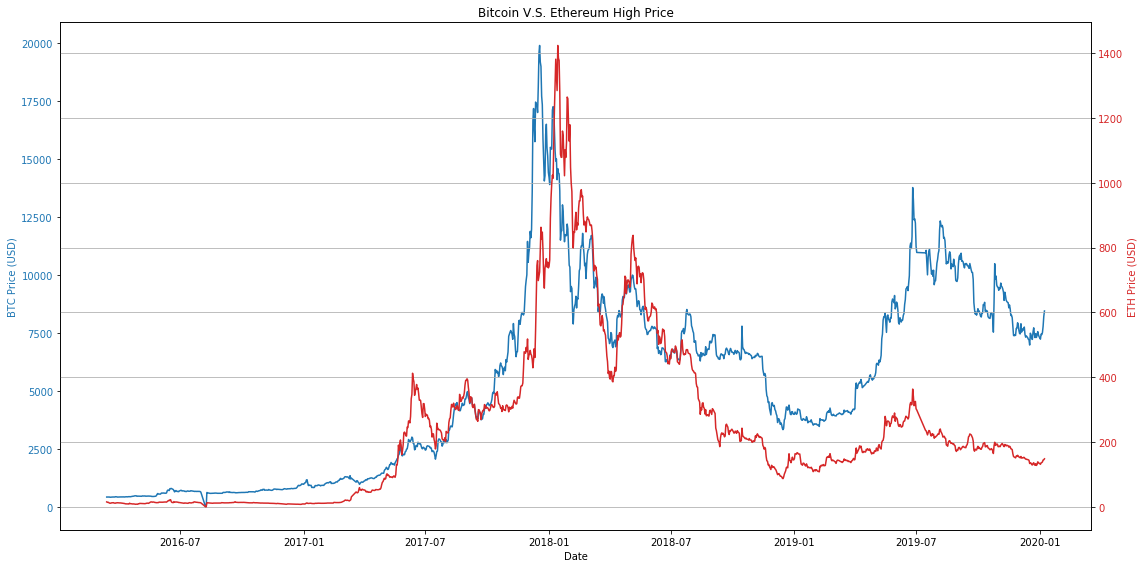

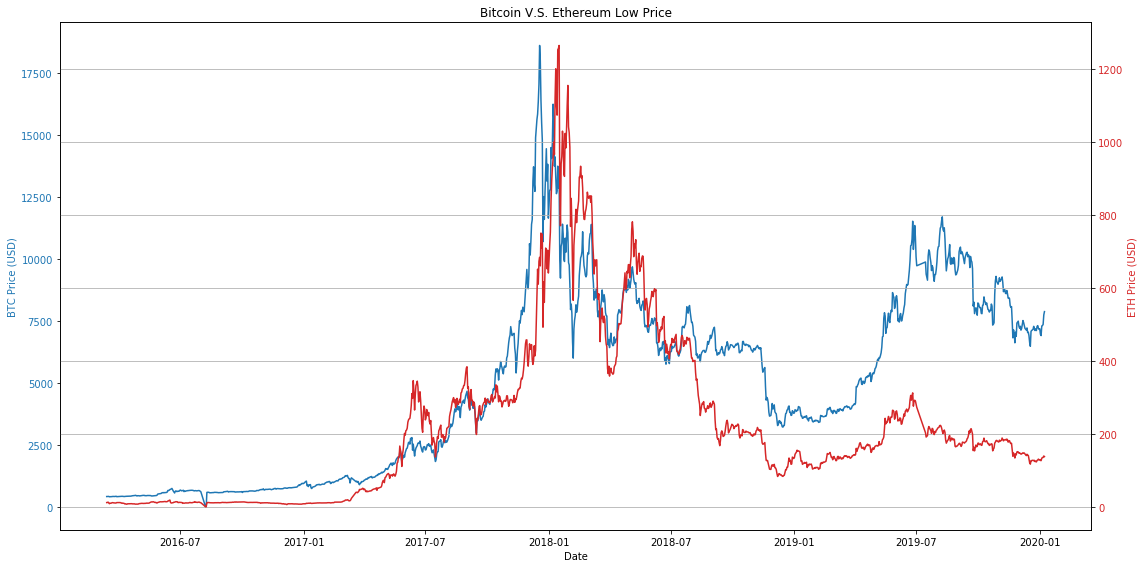

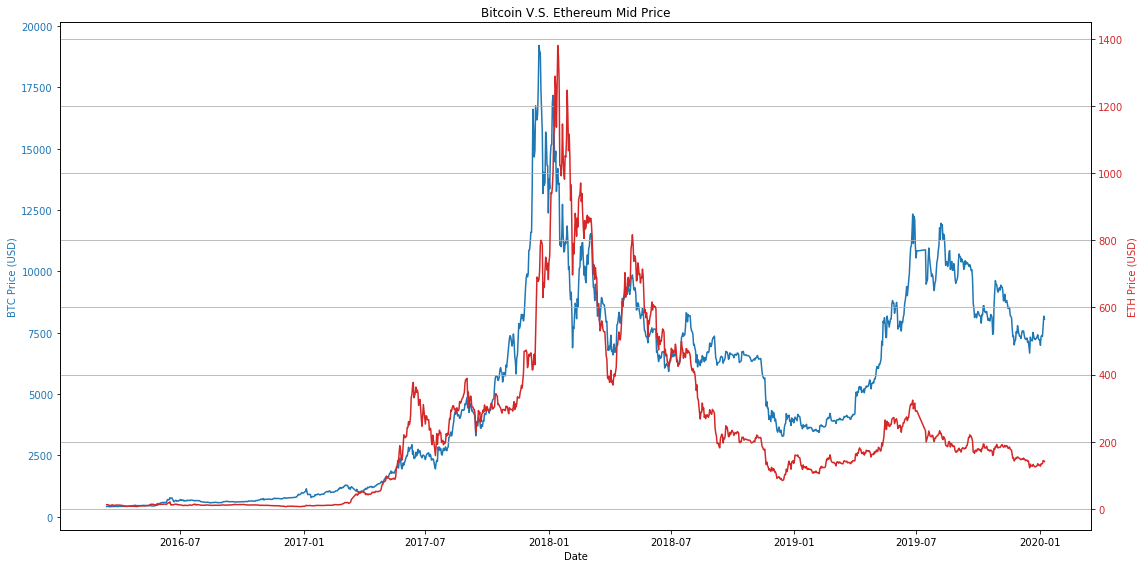

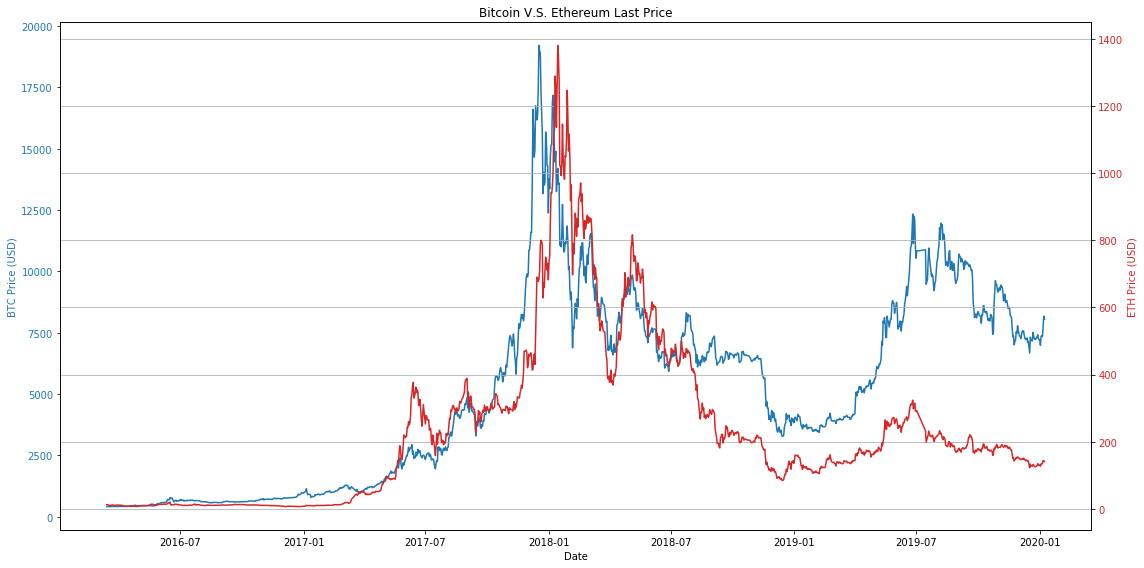

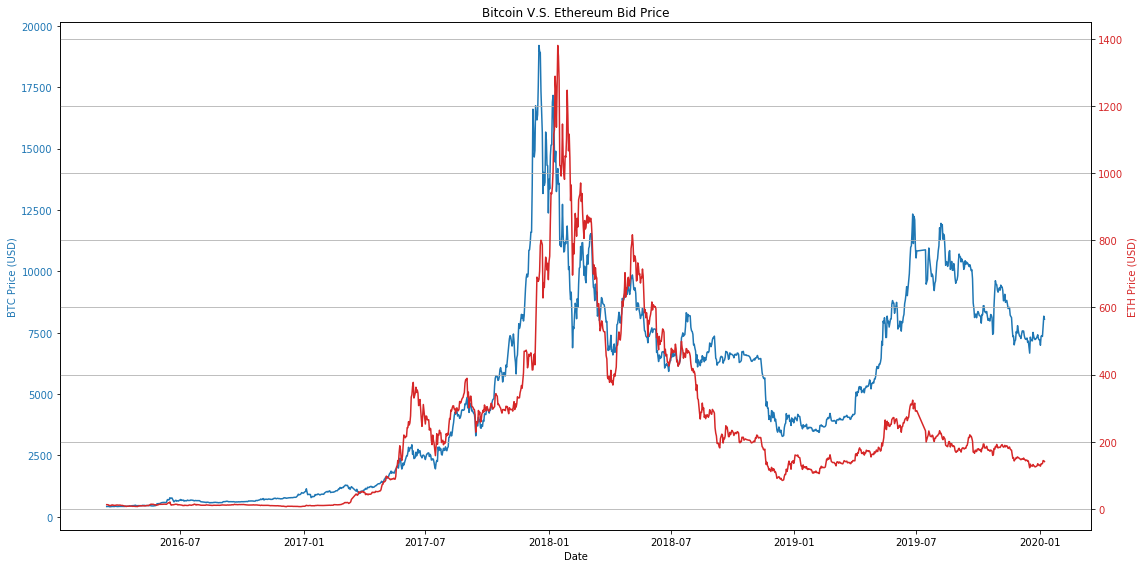

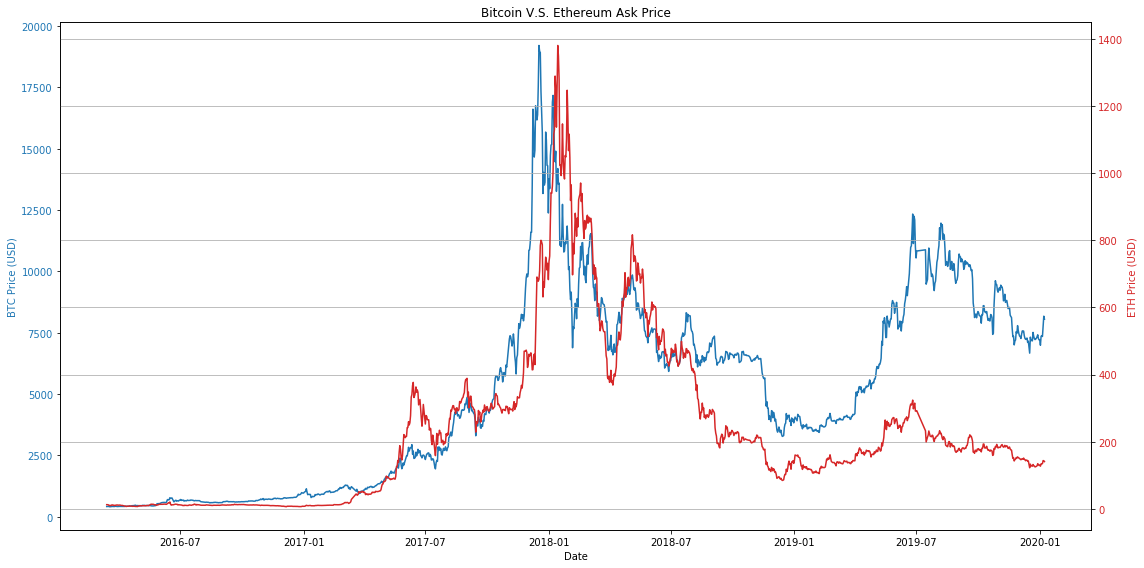

In [10]:
for price_type in price_types:
    plot_btc_eth_price_comparison2(price_type)

# Correlation between Bitcion and Ethereum

In [11]:
df.drop(columns=['Volume_btc', 'Volume_eth']).corr(method='pearson')

,High_btc,Low_btc,Mid_btc,Last_btc,Bid_btc,Ask_btc,High_eth,Low_eth,Mid_eth,Last_eth,Bid_eth,Ask_eth
High_btc,1.000000,0.996049,0.998438,0.998436,0.998437,0.998440,0.748053,0.753124,0.750644,0.750657,0.750678,0.750610
Low_btc,0.996049,1.000000,0.997916,0.997913,0.997919,0.997912,0.731802,0.741912,0.736824,0.736846,0.736877,0.736771
Mid_btc,0.998438,0.997916,1.000000,1.000000,1.000000,1.000000,0.740015,0.747801,0.744893,0.744911,0.744934,0.744851
Last_btc,0.998436,0.997913,1.000000,1.000000,1.000000,1.000000,0.740030,0.747815,0.744908,0.744926,0.744949,0.744867
Bid_btc,0.998437,0.997919,1.000000,1.000000,1.000000,1.000000,0.739994,0.747782,0.744872,0.744890,0.744913,0.744831
Ask_btc,0.998440,0.997912,1.000000,1.000000,1.000000,1.000000,0.740036,0.747820,0.744913,0.744931,0.744954,0.744872
High_eth,0.748053,0.731802,0.740015,0.740030,0.739994,0.740036,1.000000,0.995947,0.998285,0.998279,0.998274,0.998295
Low_eth,0.753124,0.741912,0.747801,0.747815,0.747782,0.747820,0.995947,1.000000,0.997711,0.997720,0.997721,0.997700
Mid_eth,0.750644,0.736824,0.744893,0.744908,0.744872,0.744913,0.998285,0.997711,1.000000,1.000000,1.000000,1.000000
Last_eth,0.750657,0.736846,0.744911,0.744926,0.744890,0.744931,0.998279,0.997720,1.000000,1.000000,1.000000,1.000000


In [12]:
df.drop(columns=['Volume_btc', 'Volume_eth']).corr(method='pearson').loc['High_btc', 'High_eth']

0.7480531022772123

In [13]:
for price_type in price_types:
    print('*'*66)
    print(df[[f'{price_type}_btc', f'{price_type}_eth']].corr(method='pearson'))

******************************************************************
          High_btc  High_eth
High_btc  1.000000  0.748053
High_eth  0.748053  1.000000
******************************************************************
          Low_btc   Low_eth
Low_btc  1.000000  0.741912
Low_eth  0.741912  1.000000
******************************************************************
          Mid_btc   Mid_eth
Mid_btc  1.000000  0.744893
Mid_eth  0.744893  1.000000
******************************************************************
          Last_btc  Last_eth
Last_btc  1.000000  0.744926
Last_eth  0.744926  1.000000
******************************************************************
          Bid_btc   Bid_eth
Bid_btc  1.000000  0.744913
Bid_eth  0.744913  1.000000
******************************************************************
          Ask_btc   Ask_eth
Ask_btc  1.000000  0.744872
Ask_eth  0.744872  1.000000


In [14]:
def correlation_heatmap(df, title, absolute_bounds=True):
    # Plot a correlation heatmap for the entire dataframe
    heatmap = go.Heatmap(
        z=df.corr(method='pearson').as_matrix(),
        x=df.columns,
        y=df.columns,
        colorbar=dict(title='Pearson Coefficient'),
    )
    
    layout = go.Layout(title=title)
    
    if absolute_bounds:
        heatmap['zmax'] = 1.0
        heatmap['zmin'] = -1.0
        
    fig = go.Figure(data=[heatmap], layout=layout)
    py.iplot(fig)

In [15]:
correlation_heatmap(df.drop(columns=['Volume_btc', 'Volume_eth']), 'Correlation between bitcion and ethereum')

/Users/shaolongchen/py365/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

